In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as sts

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

import seaborn as sns

### Import source data

In [2]:
folder_path = r'C:\Users\igord\Projects\Manning\Outliers\outlier_data'

separator = '\\'

file_list = os.listdir(folder_path)

In [3]:
print(file_list)

['data1.csv', 'data2.csv', 'data3.csv']


In [4]:
data1 = pd.read_csv(folder_path + separator + file_list[0])

In [5]:
data2 = pd.read_csv(folder_path + separator + file_list[1])

In [6]:
data3 = pd.read_csv(folder_path + separator + file_list[2])

## 1.Basic statistics

#### 1.1 Summary statistics

In [7]:
data1.describe()

,x,y
count,21.000000,21.000000
mean,4.833548,16.972012
std,2.954291,9.745003
min,1.395607,4.712704
25%,2.232253,8.773437
50%,4.441539,15.934874
75%,7.017044,25.858405
max,9.881830,32.675550


In [8]:
data2.describe()

,x,y
count,21.000000,21.000000
mean,5.309738,17.733917
std,3.695428,11.242790
min,1.395607,4.712704
25%,2.232253,8.773437
50%,4.441539,15.934874
75%,7.932816,25.858405
max,15.000000,45.000000


In [9]:
data3.describe()

,x,y
count,21.000000,21.000000
mean,5.309738,16.305346
std,3.695428,9.351964
min,1.395607,4.712704
25%,2.232253,8.773437
50%,4.441539,15.336046
75%,7.932816,21.900857
max,15.000000,32.675550


#### 1.2. Drawing datasets as-is

Dataset1 outlier: x = 5

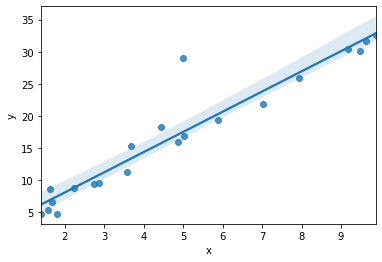

In [10]:
sns.regplot(x = 'x', y = 'y', data = data1);

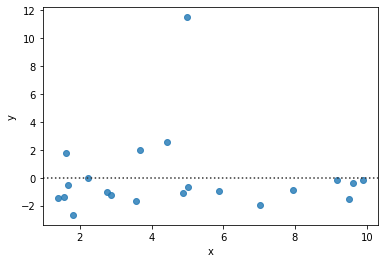

In [11]:
sns.residplot(x = 'x', y = 'y', data = data1);

Dataset2 contains no visible outliers, but there is a high-leverage point of x = 20

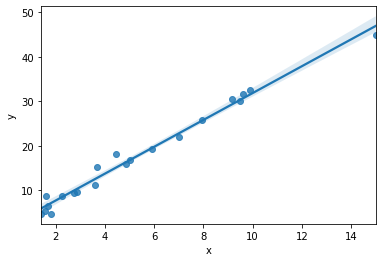

In [12]:
sns.regplot(x = 'x', y = 'y', data = data2);

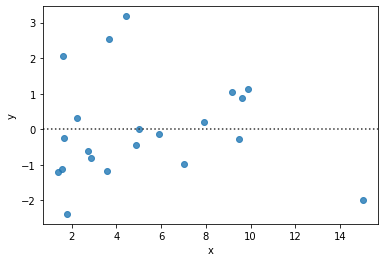

In [13]:
sns.residplot(x = 'x', y = 'y', data = data2);

Dataset3 outlieers: x = 15; it is also a high-leverage point

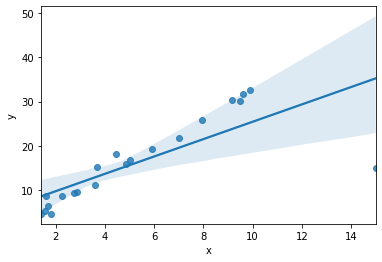

In [14]:
sns.regplot(x = 'x', y = 'y', data = data3);

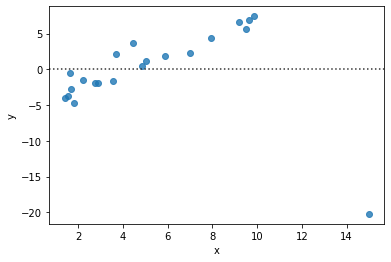

In [15]:
sns.residplot(x = 'x', y = 'y', data = data3);

#### 1.3 Drawing datasets w/o outliers



In [16]:
data11 = data1.copy()

In [17]:
data11 = data11[data11['x'] != 5]

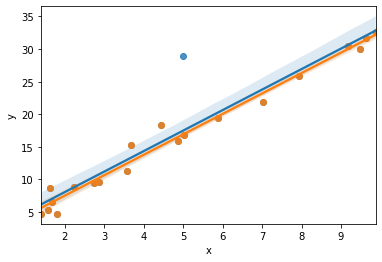

In [23]:
sns.regplot(x = 'x', y = 'y', data = data1);
sns.regplot(x = 'x', y = 'y', data = data11);

In [25]:
data21 = data2.copy()

In [26]:
data21 = data21[:-1]

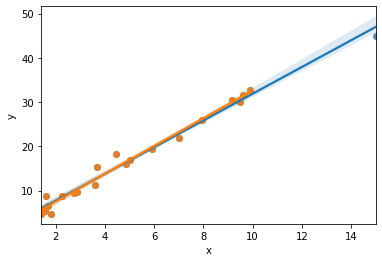

In [27]:
sns.regplot(x = 'x', y = 'y', data = data2);
sns.regplot(x = 'x', y = 'y', data = data21);

In [19]:
data31 = data3.copy()

In [20]:
data31 = data31[:-1]

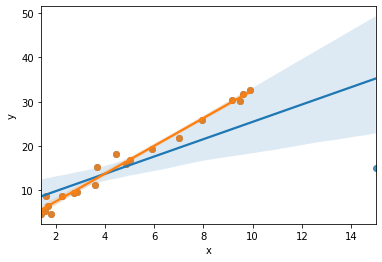

In [24]:
sns.regplot(x = 'x', y = 'y', data = data3);
sns.regplot(x = 'x', y = 'y', data = data31);

### 1.4 Program a function that runs two linear regression anayses for a dataset: with and without the unusual observations

"""
Parameters
-----------------
regression formula: response ~ predictor1 + predictor2...
data: dataset
data_small: subset of data without unusual observations
verbose:    if True print summary of the regression
                        if False print only the regression coefficients
Returns
-----------------
tuple with the fitted models
(fit, fit_small)
"""

In [30]:
def run_regression_models(formula, df, df_small, verbose = False):
    """ Runs two regression analyses: one with all the observations and one with a subset
    Parameters
    ----------
    formula: regression formula: response ~ predictor 1 + predictor 2 + ... + predictor n
    df: dataset
    df_small: subset of df
    verbose: if True print summary of the regression
             if False print only the regression coefficients
    Returns
    -------
    (fit, fit_small) the fitted models
    """
        
    model = smf.ols(formula= formula, data=df)    # Describe model

    fit = model.fit()       # Fit model   
    
    model_small = smf.ols(formula=formula, data=df_small)    # Describe model
    fit_small = model_small.fit()       # Fit model

    if verbose:
        print(fit.summary())   
        print(fit_small.summary())
    else:
        print('Parameters for regression: y ~ x' )
        print('With all rows:')
        print(fit.params.apply(lambda x: "{:.8f}".format(x)))   
        print('Without unusual observation')
        print(fit_small.params.apply(lambda x: "{:.8f}".format(x))) 

    return fit, fit_small

In [32]:
dfs = [(data1, data11), (data2, data21), (data3, data31)]
fits = []
for i, (df, df_small) in enumerate(dfs):
    print("\nModel "+str(i+1))
    fit, fit_small = run_regression_models('y ~ x',df, df_small)
    fits.append((fit, fit_small))


Model 1
Parameters for regression: y ~ x
With all rows:
Intercept    1.77004630
x            3.14509487
dtype: object
Without unusual observation
Intercept    1.25041270
x            3.13357409
dtype: object

Model 2
Parameters for regression: y ~ x
With all rows:
Intercept    1.70847234
x            3.01812335
dtype: object
Without unusual observation
Intercept    1.25041270
x            3.13357409
dtype: object

Model 3
Parameters for regression: y ~ x
With all rows:
Intercept    5.93148648
x            1.95374215
dtype: object
Without unusual observation
Intercept    1.25041270
x            3.13357409
dtype: object


In [33]:
fits[0][1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     916.5
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           6.83e-17
Time:                        15:01:50   Log-Likelihood:                -33.584
No. Observations:                  20   AIC:                             71.17
Df Residuals:                      18   BIC:                             73.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2504      0.586      2.135      0.047       0.020       2.481
x              3.1336      0.104     30.273      0.000       2.916       3.351
==============================================================================
Omnibus:                        5.510   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.553
Skew:                           1.008   Prob(JB):                        0.169
Kurtosis:                       3.450   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Unusual observations

In [34]:
def unusual_obs_analysis(rows_out, x, y, data, verbose=False):
    """ Prints plots and statistics of unusual observations
    
    Parameters
    ----------
    rows_out: list of rows to investigate
    x: predictor
    y: response
    data: dataframe
    verbose: if True print summary of the regression
             if False print only the regression coefficients
    
    Returns
    -------
    (fig, (ax0, ax1)), (fit, fit_small) 
    
    """

    # do the regression plots
    fig, ax = plt.subplots(nrows = 1, ncols= 1,  figsize=(12, 7))   
    x_min = data[x].min()-0.5
    x_max = data[x].max()+0.5
    
    # first plot with all the rows in ax0
    sns.regplot(x = x, y = y, data=data, ax=ax)
    ax.set(title= "Regression plots with and without unusual observation")
    ax.set_xlim(x_min,x_max)

    # second plot without the rows in *rows_out*
    # compute the rows that are not in rows_out
    rows_subset = data.index.difference(rows_out)

    # define dataframe without rows in rows_out
    data_subset = data.loc[rows_subset,:]

    # second plot without the rows in rows_out in ax1
    sns.regplot(x = x, y = y, data=data_subset, ax=ax)

    # Do 2 regressions: with and without the rows in rows_out
    
    formula = y +' ~ ' + x
    fit, fit_small = run_regression_models(formula, data, data_subset, verbose)
        
    return (fig, ax) , (fit, fit_small)

Parameters for regression: y ~ x
With all rows:
Intercept    1.77004630
x            3.14509487
dtype: object
Without unusual observation
Intercept    1.25041270
x            3.13357409
dtype: object


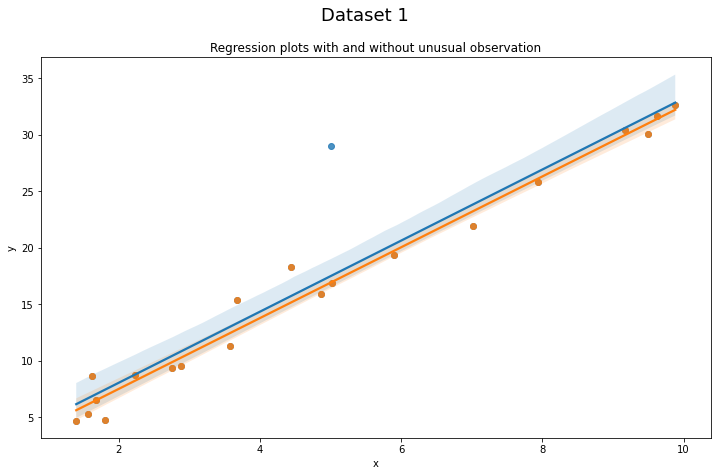

In [35]:
# Model 1
(fig, ax) , (fit1, fit1_small) = unusual_obs_analysis([12],x = 'x', y = 'y', data = data1)
fig.suptitle("Dataset 1", fontsize=18)
plt.show()

Parameters for regression: y ~ x
With all rows:
Intercept    1.70847234
x            3.01812335
dtype: object
Without unusual observation
Intercept    1.25041270
x            3.13357409
dtype: object


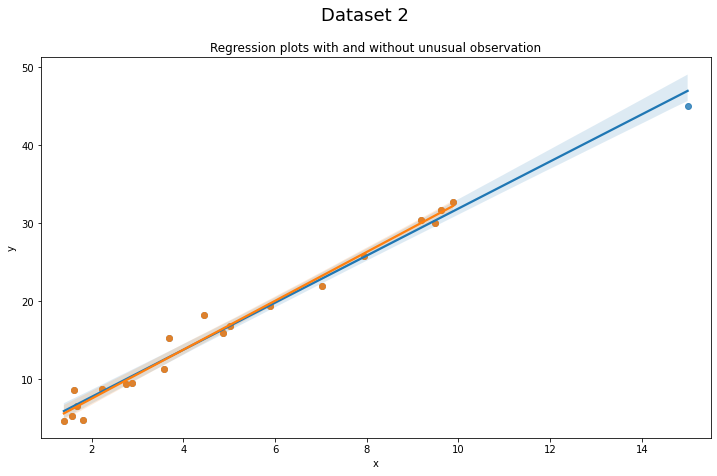

In [36]:
# Model 2
(fig, ax) , (fit2, fit2_small) = unusual_obs_analysis([20],x = 'x', y = 'y', data = data2)
fig.suptitle("Dataset 2", fontsize=18)
plt.show()

Parameters for regression: y ~ x
With all rows:
Intercept    5.93148648
x            1.95374215
dtype: object
Without unusual observation
Intercept    1.25041270
x            3.13357409
dtype: object


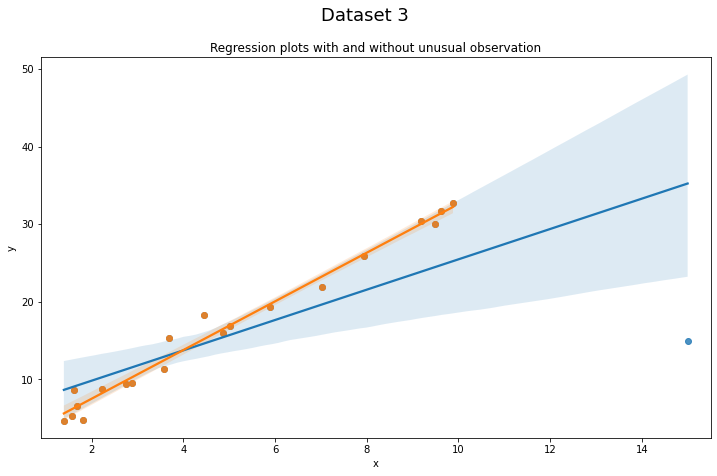

In [37]:
# Model 3
(fig, ax), (fit3, fit3_small) = unusual_obs_analysis([20],x = 'x', y = 'y', data = data3)
fig.suptitle("Dataset 3", fontsize=18)
plt.show()

## 3. High-leverage points

In [38]:
# The dataset should have an index identifying the observations.
def hat_values_plot(fit, ax):
    """ Prints hat values plot
    Parameters
    ----------
    fit : fitted model
    
    Returns
    -------
    hat_values as Series

    h_bar = p/n : mean hat value
    Observations whose hat values are >= 2 * h_bar are annotated
    p: number of parameters estimated in the model (including the intercept)
    n: sample size
    """
    
    
    # number of regressors + 1
    p = len(fit.params)
    # number of observations
    n = len(fit.fittedvalues)
    # mean hat value
    mean_hat = p/n
    # get OLSInfluence Object
    influence_obj = fit.get_influence()
    # retrieve hat values
    hat_values = influence_obj.hat_matrix_diag # get the hat values from the OLSInfluence object
    hat_values_series = pd.Series(hat_values, index = fit.resid.index, name='HatValues')
    
    # define the plots
    ax.set(title="Index Plot of Hat Values")
    # plot an horizontal blue dotted line at mean_hat
    ax.axhline(y=mean_hat, color='b', linestyle='dotted', linewidth=1, label = "mean hat")
    # plot an horizontal green line at mean_hat * 2
    ax.axhline(y=2*mean_hat, color='g', linestyle='--', linewidth=1, label = "mean hat * 2")
    # plot an horizontal red line at mean_hat * 3
    ax.axhline(y=3*mean_hat, color='r', linestyle='--', linewidth=1, label = "mean hat * 3")
    
    # for clarity, if the labels are too long, rotate the x-labels 90 degrees
    labels = hat_values_series.index
    if (labels.map(lambda x: len(str(x))).max()) > 2:
        angle = 90
    else:
        angle = 0

    # do the stem plot of hat values per state. 
    markerline, stemlines, baseline = ax.stem(labels, hat_values_series, linefmt = 'b-.', basefmt='None', use_line_collection=True)
    plt.xticks(labels,labels, rotation = angle)

    # annotate hat values that >= 2 * mean_hat
    bound = 2 * mean_hat
    print("Hat values greater that bound: {:.4f}".format(bound))
    for id, val in hat_values_series.items():
        if val >= bound:
            ax.annotate(id,xy=(id,val))
            print("{}: {:.2f}".format(id,val))
    ax.legend()
    return hat_values_series


In [39]:
# Fit a model for each dataset
formula = 'y ~ x'
model1 = smf.ols(formula=formula, data=data1)    # Describe model
fit1 = model1.fit()       # Fit model

model2 = smf.ols(formula=formula, data=data2)    # Describe model
fit2 = model2.fit()       # Fit model

model3 = smf.ols(formula=formula, data=data3)    # Describe model
fit3 = model3.fit()       # Fit model


Hat values greater that bound: 0.1905
20: 0.19


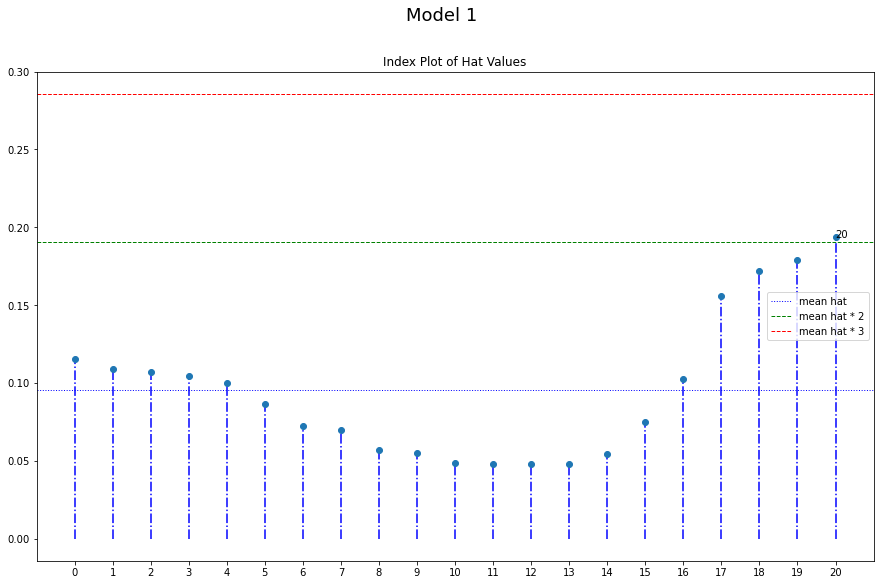

In [40]:
fig, ax = plt.subplots(figsize=(15,9))
h1 = hat_values_plot(fit1, ax)
fig.suptitle("Model 1", fontsize=18)
plt.show()

Hat values greater that bound: 0.1905
20: 0.39


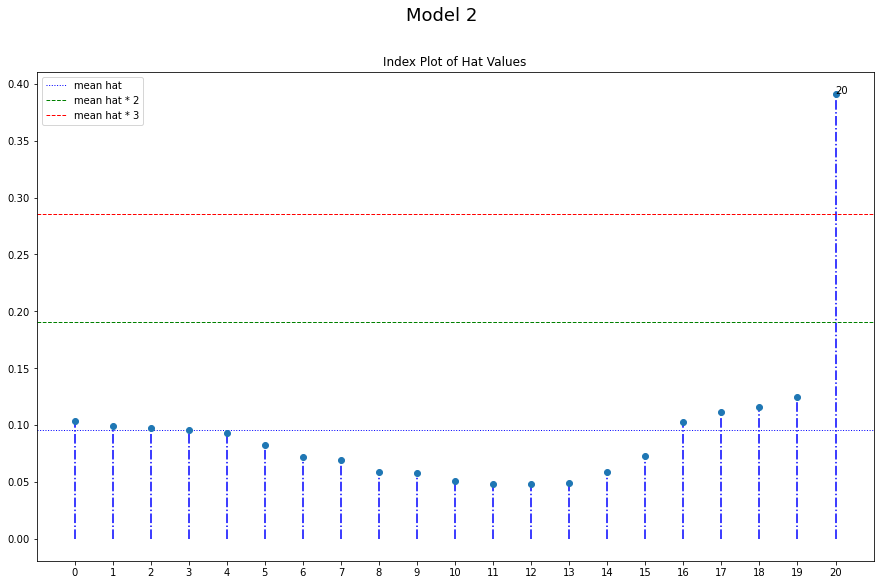

In [41]:
fig, ax = plt.subplots(figsize=(15,9))
h2 = hat_values_plot(fit2, ax)
fig.suptitle("Model 2", fontsize=18)
plt.show()

Hat values greater that bound: 0.1905
20: 0.39


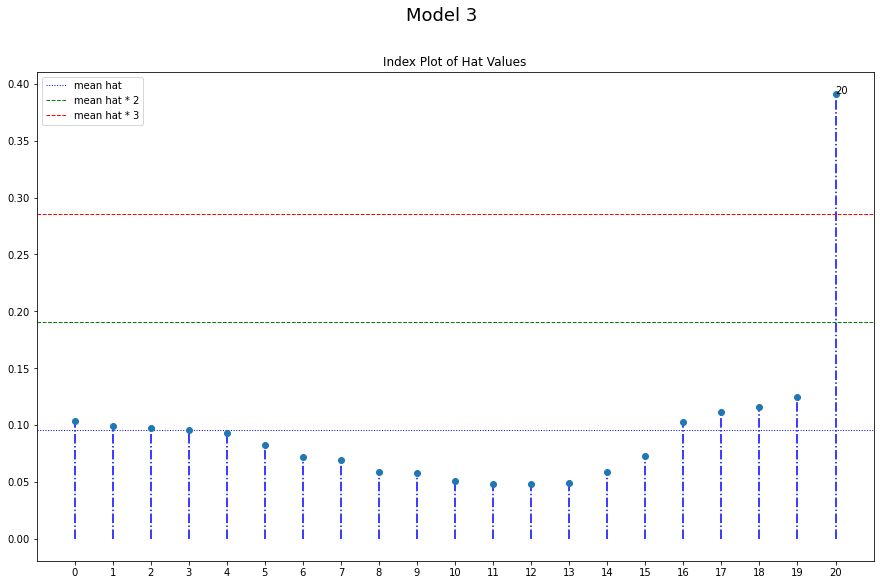

In [42]:
fig, ax = plt.subplots(figsize=(15,9))
h3 = hat_values_plot(fit3, ax)
fig.suptitle("Model 3", fontsize=18)
plt.show()

Dataset 1: no high-leverage points; Dataset 2, 3: the last (x20) point is high-leverage as it exceeds hat*3 threshold

## 4.Higher dimensions

In [44]:
duncan_dataset = sm.datasets.get_rdataset(dataname = "Duncan",package = "carData")
duncan = duncan_dataset.data

In [45]:
# do a regression of prestige ~ income + education and plot the coefficients
formula = 'prestige ~ income + education'
model_duncan = smf.ols(formula= formula, data=duncan)    # Describe model
fit_duncan = model_duncan.fit()       # Fit model
fit_duncan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           8.65e-17
Time:                        15:30:19   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hat values greater that bound: 0.1333
minister: 0.17
conductor: 0.19
RR.engineer: 0.27


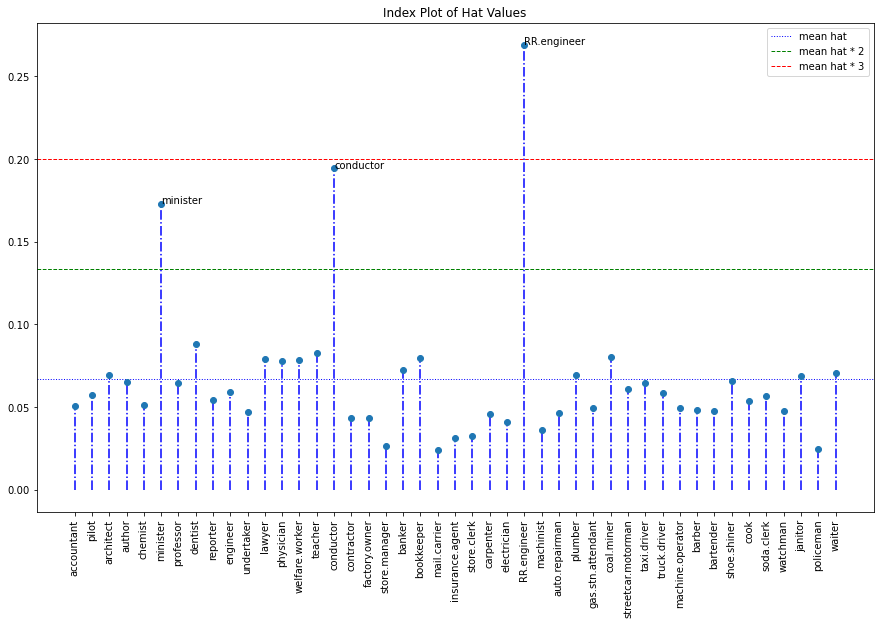

In [46]:
# plot the hat values of the regression prestige ~ income + education
fig, ax = plt.subplots(figsize=(15,9))
hd = hat_values_plot(fit_duncan, ax)

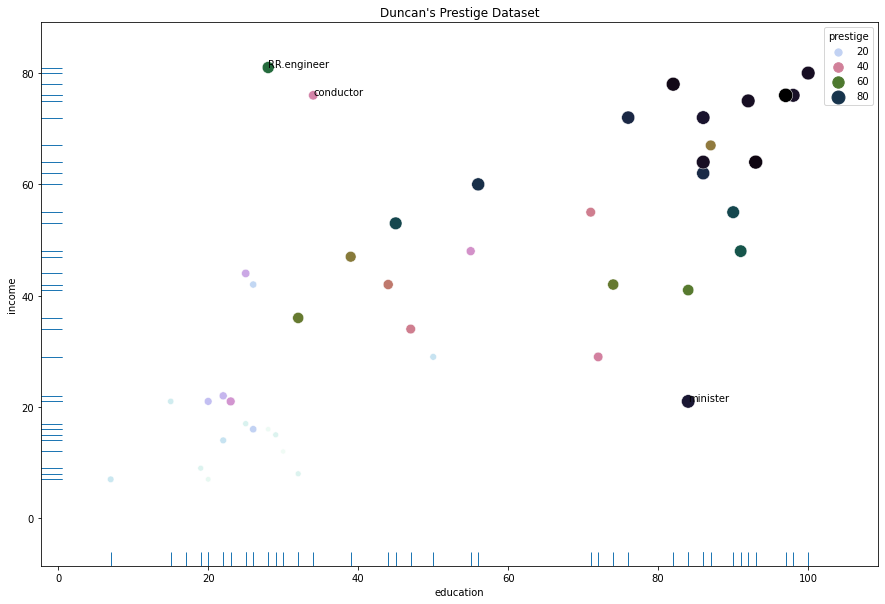

In [47]:
# do a scatterplot of  income vs education. Use the semantic of size and hue to incorporate the variable prestige in the plot
fig, ax = plt.subplots(figsize = (15,10))
sns.scatterplot(y = 'income' ,x = 'education' , size='prestige', hue='prestige', palette="cubehelix_r",  data = duncan, ax=ax, sizes=(20,200))
sns.rugplot(y = 'income' ,x = 'education', data = duncan, ax=ax)
ax.set_title("Duncan\'s Prestige Dataset")
ann_list = ["minister","RR.engineer","conductor"]
for prof, x in duncan.loc[ann_list,'education'].items():
    y = duncan.loc[prof,"income"]
    ax.annotate(prof,xy=(x,y))